In [0]:
#Importing the Libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#Loding libraries and defining attention
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed
from keras import backend as K
from keras import optimizers
from keras.models import Model
import os
os.getcwd()

'/content/drive/My Drive'

In [0]:
#Setting the working directory
os.chdir('/content/drive/My Drive/')

In [0]:
#Loading the Clean data
data_df = pd.read_excel('preprocessing_local_data_Input Data Synthetic CleanedV3-1.xlsx')

In [0]:
#Verifying the data load
data_df.tail()

,Unnamed: 0,Short description,Description,Caller,Assignment group,description_cleaned,short_description_cleaned,tmp_target_count,target1,spacy_col,language,score,lang_textblob
8495,8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,avglmrts vhqmtiua,GRP_29,good afternoon not receive email send mail advise,email not come mail,97,GRP_29,good afternoon not receive email send mail advise,en,0.999995,en
8496,8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony software issue,telephony software issue,3975,GRP_0,telephony software issue,en,0.999996,en
8497,8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip windows password reset tifpdchb pedxruyf,vip windows password reset tifpdchb pedxruyf,3975,GRP_0,vip windows password reset tifpdchb pedxruyf,en,0.999995,en
8498,8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,unable access machine utility finish drawer ad...,machine na esta funcionando,25,GRP_62,unable access machine utility finish drawer ad...,en,0.999995,en
8499,8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,mehreren lassen sich verschiedene prgramdntyme...,mehreren lassen sich verschiedene prgramdntyme...,6,GRP_49,mehreren lassen sich verschiedene prgramdntyme...,de,0.999995,de


In [0]:
#Creating a backup
data_df_bk = data_df

In [0]:
#Subsetting the data - Retainning only required columns
data_df = data_df[['description_cleaned','Assignment group','short_description_cleaned','language','target1']]

In [0]:
#Verify the subset data
data_df.head()

,description_cleaned,Assignment group,short_description_cleaned,language,target1
0,verify user detail employee manager name check...,GRP_0,login issue,en,GRP_0
1,team meeting skype meeting not appear outlook ...,GRP_0,outlook,en,GRP_0
2,can not log vpn,GRP_0,can not log vpn,en,GRP_0
3,unable access hr tool page,GRP_0,unable access hr tool page,en,GRP_0
4,skype error,GRP_0,skype error,no,GRP_0


In [0]:
#Renaming the columns names
data_df.rename(columns={'description_cleaned':'description','Assignment group':'Asggrp','short_description_cleaned':'shortdesc','language':'lang'},inplace = True)

In [0]:
#Creating a backup
data_df_bk = data_df

In [0]:
#Subset the data - COnsidering only english data
data_df = data_df[data_df['lang']=='en']

In [0]:
#Resetting the index after the filter
data_df.reset_index(drop=True, inplace=True)

#Summary of data
data_df.head()

,description,Asggrp,shortdesc,lang,target1
0,verify user detail employee manager name check...,GRP_0,login issue,en,GRP_0
1,team meeting skype meeting not appear outlook ...,GRP_0,outlook,en,GRP_0
2,can not log vpn,GRP_0,can not log vpn,en,GRP_0
3,unable access hr tool page,GRP_0,unable access hr tool page,en,GRP_0
4,event critical value mountpoint threshold orac...,GRP_1,event critical value mountpoint threshold orac...,en,GRP_1


In [0]:
#Check number of records of english data
len(data_df)

5282

In [0]:
#Subset the data - COnsidering only english data
data_df.dropna(axis=0,inplace=True)

In [0]:
#Resetting the index after the filter
data_df.reset_index(drop=True, inplace=True)

#Summary of data
data_df.head()

,description,Asggrp,shortdesc,lang,target1
0,verify user detail employee manager name check...,GRP_0,login issue,en,GRP_0
1,team meeting skype meeting not appear outlook ...,GRP_0,outlook,en,GRP_0
2,can not log vpn,GRP_0,can not log vpn,en,GRP_0
3,unable access hr tool page,GRP_0,unable access hr tool page,en,GRP_0
4,event critical value mountpoint threshold orac...,GRP_1,event critical value mountpoint threshold orac...,en,GRP_1


In [0]:
#Check number of records after dropping null records
len(data_df)

5271

In [0]:
#Number of samples groupwise
from collections import Counter
from matplotlib import pyplot
counter1 = Counter(data_df['Asggrp'])
counter2 = Counter(data_df['target1'])
print(len(counter1),len(counter2))
print((counter1),(counter2))

74 59
Counter({'GRP_0': 2483, 'GRP_8': 371, 'GRP_2': 209, 'GRP_12': 179, 'GRP_19': 168, 'GRP_3': 156, 'GRP_13': 124, 'GRP_14': 102, 'GRP_4': 93, 'GRP_5': 87, 'GRP_25': 86, 'GRP_9': 81, 'GRP_29': 80, 'GRP_10': 80, 'GRP_16': 76, 'GRP_18': 73, 'GRP_7': 65, 'GRP_6': 64, 'GRP_26': 49, 'GRP_34': 39, 'GRP_40': 38, 'GRP_41': 36, 'GRP_15': 34, 'GRP_28': 31, 'GRP_20': 30, 'GRP_22': 28, 'GRP_21': 27, 'GRP_11': 26, 'GRP_24': 26, 'GRP_33': 26, 'GRP_45': 24, 'GRP_31': 22, 'GRP_1': 20, 'GRP_23': 20, 'GRP_39': 17, 'GRP_37': 14, 'GRP_60': 14, 'GRP_47': 13, 'GRP_27': 12, 'GRP_44': 11, 'GRP_17': 10, 'GRP_30': 10, 'GRP_50': 10, 'GRP_62': 10, 'GRP_36': 9, 'GRP_53': 8, 'GRP_65': 8, 'GRP_51': 7, 'GRP_52': 6, 'GRP_55': 6, 'GRP_43': 5, 'GRP_42': 5, 'GRP_59': 5, 'GRP_46': 4, 'GRP_56': 3, 'GRP_58': 3, 'GRP_63': 3, 'GRP_49': 3, 'GRP_66': 3, 'GRP_54': 2, 'GRP_48': 2, 'GRP_69': 2, 'GRP_71': 2, 'GRP_35': 1, 'GRP_38': 1, 'GRP_57': 1, 'GRP_61': 1, 'GRP_32': 1, 'GRP_64': 1, 'GRP_67': 1, 'GRP_68': 1, 'GRP_70': 1, 'GRP_7

In [0]:
#Updated some groups that had less than 3 samples.
data_df['target1'].replace(['GRP_32','GRP_49','GRP_66','GRP_48'],'OTHER',inplace=True) 

ELMO

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn import preprocessing
from keras.layers import SpatialDropout1D
import keras
import numpy as np

url = "https://tfhub.dev/google/elmo/2"
embed = hub.Module(url)

#data = pd.read_excel('Input Data Synthetic CleanedV2.xlsx')

y = list(data_df['target1'])
x = list(data_df['description'])

le = preprocessing.LabelEncoder()
le.fit(y)

def encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode(le, one_hot):
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

test = encode(le, ['GRP_0', 'GRP_34', 'GRP_28', 'GRP_47'])

untest = decode(le, test)

x_enc = x
y_enc = encode(le, y)

x_train = np.asarray(x_enc[:4000])
y_train = np.asarray(y_enc[:4000])

x_test = np.asarray(x_enc[4000:])
y_test = np.asarray(y_enc[4000:])

from keras.layers import Input, Lambda, Dense
from keras.models import Model
import keras.backend as K

def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

input_text = Input(shape=(1,), dtype=tf.string)
embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
 
dense = Dense(256, activation='relu')(embedding)
pred = Dense(55, activation='softmax')(dense)
model = Model(inputs=[input_text], outputs=pred)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    #model.load_weights('./elmo-model.h5')
    history = model.fit(x_train, y_train, epochs=10, batch_size=32)
    model.save_weights('./elmo-model.h5')
    predicts = model.predict(x_test, batch_size=32)


#with tf.Session() as session:
#    K.set_session(session)
#    session.run(tf.global_variables_initializer())
#    session.run(tf.tables_initializer())
#    model.load_weights('./elmo-model.h5')  
#    predicts = model.predict(x_test, batch_size=32)

y_test = decode(le, y_test)
y_preds = decode(le, predicts)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Epoch 1/10
4000/4000 [==============================] - 88s 22ms/step - loss: 2.6274 - acc: 0.4890
Epoch 2/10
4000/4000 [==============================] - 87s 22ms/step - loss: 2.4442 - acc: 0.4960
Epoch 3/10
4000/4000 [==============================] - 86s 21ms/step - loss: 2.1762 - acc: 0.5282
Epoch 4/10
4000/4000 [==============================] - 84s 21ms/step - loss: 2.0718 - acc: 0.5408
Epoch 5/10
4000/4000 [==============================] - 91s 23ms/step - loss: 2.3705 - acc: 0.5260
Epoch 6/10
4000/4000 [==============================] - 82s 21ms/step - loss: 2.1392 - acc: 0.5447
Epoch 7/10
4000/4000 [==============================] - 87s 22ms/step - loss: 2.3502 - acc: 0.5353
Epoch 8/10
4000/4000 [==============================] - 85s 21ms/step - loss: 2.1670 - acc: 0.5490
Epoch 9/10
4000/4000 [==============================] - 86s 21ms/step - loss: 1.8916 - acc: 0.5632
Epoch 10/10
4000/4000 [==============================] - 83s 21ms/step - loss: 1.7897 - acc: 0.5697


AttributeError: ignored

In [42]:
from sklearn import metrics


print(metrics.accuracy_score(y_test, y_preds))

print(metrics.confusion_matrix(y_test, y_preds))

print(metrics.classification_report(y_test, y_preds))

0.5295043273013376
[[576   0   1 ...   0   0   0]
 [  2   0   0 ...   0   0   0]
 [ 11   0   2 ...   0   0   0]
 ...
 [ 28   0   0 ...  39   0   0]
 [ 11   0   0 ...   1   0   0]
 [ 11   0   0 ...   0   0   0]]
              precision    recall  f1-score   support

       GRP_0       0.55      0.98      0.71       589
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.25      0.13      0.17        15
      GRP_11       0.00      0.00      0.00         9
      GRP_12       0.50      0.01      0.03        67
      GRP_13       0.26      0.39      0.31        28
      GRP_14       0.35      0.28      0.31        25
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.50      0.08      0.14        12
      GRP_17       0.00      0.00      0.00         2
      GRP_18       0.00      0.00      0.00        18
      GRP_19       0.33      0.02      0.05        41
       GRP_2       0.61      0.38      0.47        53
      GRP_20       0.00      0.0

In [0]:
#Importing Libraries
from keras.preprocessing.text import Tokenizer
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pandas_profiling as pp
%matplotlib inline
import pandas as pd
#Importing lirbraries for text pre-processing
import spacy
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
#from contractions import contractions_dict
import unicodedata
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#Tokenizing the data
token = Tokenizer(num_words=20000)
word_index = token.fit_on_texts(data_df['description'])


In [0]:
#Size of the dictionary
len(token.word_index)

8967

In [0]:
#Sample verification
token.word_index['control']

615

In [0]:
#Statistics of tokenization
print(token.word_counts)
print(token.word_docs)
print(token.document_count)

OrderedDict([('verify', 59), ('user', 1257), ('detail', 227), ('employee', 161), ('manager', 279), ('name', 351), ('check', 409), ('reset', 580), ('password', 1010), ('advise', 147), ('login', 443), ('caller', 85), ('confirm', 167), ('able', 361), ('issue', 875), ('resolve', 232), ('team', 366), ('meeting', 62), ('skype', 168), ('not', 1986), ('appear', 71), ('outlook', 381), ('calendar', 34), ('somebody', 2), ('correct', 98), ('can', 263), ('log', 309), ('vpn', 163), ('unable', 373), ('access', 695), ('hr', 81), ('tool', 908), ('page', 94), ('event', 544), ('critical', 27), ('value', 46), ('mountpoint', 1), ('threshold', 36), ('oracle', 12), ('sid', 734), ('erpdata', 1), ('srpsad', 2), ('datum', 191), ('perpsrpsad', 1), ('ticket', 831), ('no', 2634), ('employment', 3), ('status', 127), ('new', 319), ('nonemployee', 3), ('enter', 159), ('engineering', 194), ('say', 91), ('connect', 282), ('submit', 77), ('report', 279), ('site', 699), ('load', 76), ('correctly', 53), ('sgxqsuojr', 1), 

In [0]:
texts_desc = [] #to store text of article as it is.
articles_desc = [] #split the above text into a list of sentences.

In [0]:
#Tokenization
for i in range (len(data_df)):
  texts_desc.append(data_df['description'][i])
  articles_desc.append(nltk.sent_tokenize(data_df['description'][i]))

In [0]:
#Sentences count 
for i in range(len(data_df)):
  if (len(articles_desc[i])>1):
    print(i)

In [0]:
#Verifying counts
print(len(texts_desc))
print(len(articles_desc))

5271
5271


In [0]:
#Setting the max sentences and sentence lengths
MAX_SENTS = 1
MAX_SENT_LENGTH = 50

In [0]:
#Intializing the data table 
data_desc = np.zeros((len(data_df),MAX_SENTS,MAX_SENT_LENGTH),dtype='Int64')

In [0]:
#Creating the word index table of the tokenizes sentences
for i, sentence in enumerate(articles_desc): 
  for j, sent in enumerate(sentence):
    for k,word in enumerate(text_to_word_sequence(sent)):
      #print(k,word)
      enc_word = token.word_index[word]
      if (j < MAX_SENTS and sent.strip()) and (k < MAX_SENT_LENGTH):
            data_desc[i, j, k] = enc_word
print(i,j,k)

5270 0 9


In [0]:
#Verify shape
print(data_desc.shape)

(5271, 1, 50)


In [0]:
#y=data_df['target1']

In [0]:
#print("Before OverSampling, counts of label: \n{}".format(y.value_counts()))

In [0]:
#Upsampling
#sm = SMOTE(sampling_strategy='auto',random_state=2)
#X_train_res, y_train_res = sm.fit_sample(data.reshape(data.shape[0],50), y)

In [0]:
#print("After OverSampling, counts of label: \n{}".format(pd.Series(y_train_res).value_counts()))

In [0]:
#Size of the upsample data
#print(len(X_train_res), len (y_train_res))

In [0]:
#Creating one hot encoding representation
y = pd.get_dummies(data_df['target1'])

In [0]:
#Train-test Split
from sklearn.model_selection import train_test_split

x_train_d, x_val_d, y_train_d, y_val_d = train_test_split(data_desc, y, test_size=0.2, random_state=0)

print("Number transactions X_train_d dataset: ", x_train_d.shape)
print("Number transactions y_train_d dataset: ", y_train_d.shape)
print("Number transactions X_test_d dataset: ", x_val_d.shape)
print("Number transactions y_test_d dataset: ", y_val_d.shape)

Number transactions X_train_d dataset:  (4216, 1, 50)
Number transactions y_train_d dataset:  (4216, 55)
Number transactions X_test_d dataset:  (1055, 1, 50)
Number transactions y_test_d dataset:  (1055, 55)


In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((len(token.word_index)+1, 100))

for word, i in token.word_index.items():
	#print(word,i)
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [0]:
embeddings_index = {}
f = open(GLOVE_DIR)
for line in f:
    try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        print(word)
        pass
f.close()
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
absent_words = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        absent_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

In [0]:
#Custom Attention layer
from keras.layers import Layer
import keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [0]:
#Loding libraries and defining attention
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras.callbacks import Callback, ModelCheckpoint
from keras.utils.np_utils import to_categorical
#from keras.layers import Embedding, Input, Dense, LSTM, GRU, Bidirectional, TimeDistributed
from keras import backend as K
from keras import optimizers
from keras.models import Model


def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatible with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)


class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight((input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]


In [0]:
#Import libraries
from keras.layers import Dense,Embedding,concatenate,LSTM,GRU,Bidirectional,Input,dot,Dropout,TimeDistributed,Flatten
from keras.models import Sequential,Model
from keras.optimizers import adam
from keras.regularizers import l2
from keras.metrics import categorical_crossentropy
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf

In [0]:
REG_PARAM = 1e-13
l2_reg = l2(REG_PARAM)

Bidirectional GRU without attention

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 50, 100)           896800    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 50, 512)           548352    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               492288    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 55)                1413

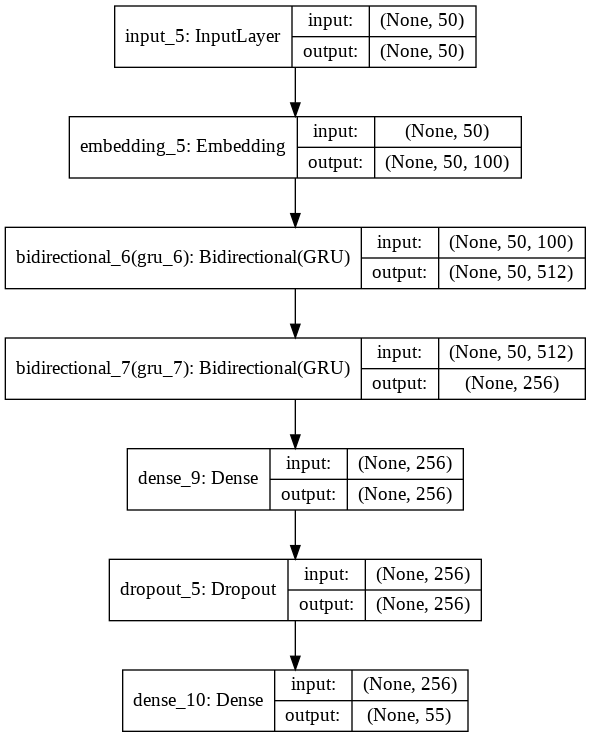

In [0]:
#Define model - Bidirectional GRU without attention
inp = Input(shape=((MAX_SENTS * MAX_SENT_LENGTH),))
x = Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False)(inp)
x = Bidirectional(GRU(256,dropout=0.25,recurrent_dropout=0.25,return_sequences=True))(x)
x = Bidirectional(GRU(128,dropout=0.25,kernel_regularizer=l2_reg, recurrent_dropout=0.3))(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(55, activation="softmax")(x)
modelNA = Model(inputs=inp, outputs=x)

#Compile Model
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
modelNA.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
print(modelNA.summary())
chck=ModelCheckpoint('Capstone_NAattention_best_model.h5', monitor='val_loss', mode='min', verbose=1,save_best_only=True)
from keras.utils import plot_model
plot_model(modelNA,show_shapes=True ,to_file='model_final.png')


In [0]:
#Fit Model
modelNA.fit([x_train_d.reshape(len(x_train_d),(MAX_SENTS * MAX_SENT_LENGTH))],[y_train_d],validation_split = 0.2,epochs=10, batch_size=32,verbose = True,callbacks=[rlrop,chck])

Train on 3372 samples, validate on 844 samples
Epoch 1/10
3372/3372 [==============================] - 62s 18ms/step - loss: 2.4142 - acc: 0.4970 - val_loss: 2.1211 - val_acc: 0.5213

Epoch 00001: val_loss improved from inf to 2.12107, saving model to Capstone_NAattention_best_model.h5
Epoch 2/10
3372/3372 [==============================] - 57s 17ms/step - loss: 2.0591 - acc: 0.5347 - val_loss: 1.9502 - val_acc: 0.5521

Epoch 00002: val_loss improved from 2.12107 to 1.95025, saving model to Capstone_NAattention_best_model.h5
Epoch 3/10
3372/3372 [==============================] - 57s 17ms/step - loss: 1.8943 - acc: 0.5519 - val_loss: 1.9195 - val_acc: 0.5604

Epoch 00003: val_loss improved from 1.95025 to 1.91955, saving model to Capstone_NAattention_best_model.h5
Epoch 4/10
3372/3372 [==============================] - 57s 17ms/step - loss: 1.7358 - acc: 0.5679 - val_loss: 1.8251 - val_acc: 0.5806

Epoch 00004: val_loss improved from 1.91955 to 1.82513, saving model to Capstone_NAatten

In [0]:
%%time
# evaluating model on validation data set
loss, acc = modelNA.evaluate([x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH))], y_val_d, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', acc)

1055/1055 [==============================] - 3s 3ms/step
Test loss: 1.8435784464198832
Test accuracy: 0.5848341235617326
CPU times: user 6.23 s, sys: 81.6 ms, total: 6.31 s
Wall time: 3.38 s


In [0]:
#Prediction
y_pred = modelNA.predict([x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH))], verbose=1)
y_pred_index = np.argmax(y_pred, axis=1)
y_pred_class = (y_pred == y_pred.max(axis=1, keepdims=True)).astype(int)
#print(f"y_pred_class: {y_pred_class[1001]}")

1055/1055 [==============================] - 4s 4ms/step


In [0]:
from sklearn.metrics import classification_report
#print("y_pred_class: ", y_pred_class[:1])
#print("y_test: ", y_val_d[:1])
print("Classification Report",'\n')
print(classification_report(y_val_d, y_pred_class, target_names=data_df.target1.unique()))

Classification Report 

              precision    recall  f1-score   support

       GRP_0       0.71      0.89      0.79       484
       GRP_1       0.00      0.00      0.00         4
       GRP_3       0.28      0.58      0.38        12
       GRP_4       0.33      0.25      0.29         4
       GRP_5       0.56      0.57      0.56        44
       GRP_7       0.27      0.43      0.33        23
       GRP_8       0.31      0.26      0.29        19
       GRP_6       0.00      0.00      0.00         4
       GRP_9       0.44      0.33      0.38        12
      GRP_11       0.00      0.00      0.00         3
      GRP_14       0.16      0.33      0.22        15
      GRP_15       0.20      0.13      0.16        23
      GRP_17       0.48      0.28      0.35        40
      GRP_18       0.00      0.00      0.00         5
       GRP_2       0.00      0.00      0.00         5
      GRP_19       0.00      0.00      0.00         4
      GRP_20       0.00      0.00      0.00         7
   



Parameters :
lrate = initial_lrate * (1 / (1 + decay * iteration)),
default lr = 0.01,
Default Momentum = 0

Bidirectional GRU with attention

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 50, 100)           896800    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 50, 512)           548352    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 50, 256)           492288    
_________________________________________________________________
attention_4 (attention)      (None, 256)               306       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0   

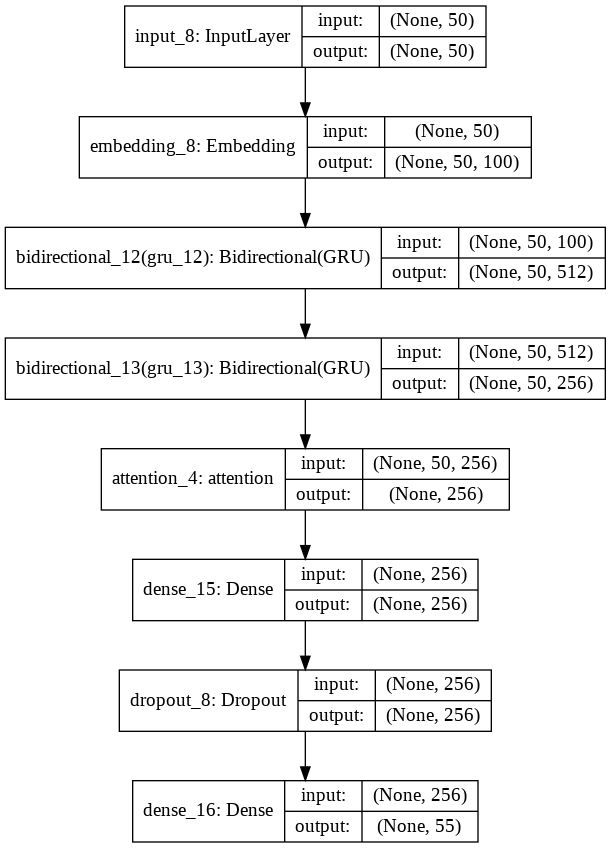

In [0]:
#Define model - Bidirectional GRU with attention
inp = Input(shape=((MAX_SENTS * MAX_SENT_LENGTH),))
x = Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False)(inp)
x = Bidirectional(GRU(256,dropout=0.25,recurrent_dropout=0.25,kernel_regularizer=l2_reg,return_sequences=True))(x)
x = Bidirectional(GRU(128,dropout=0.25,recurrent_dropout=0.25,kernel_regularizer=l2_reg,return_sequences=True))(x)
x = attention()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(55, activation="softmax")(x)
model = Model(inputs=inp, outputs=x)

#Compile Model
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
print(model.summary())
chck=ModelCheckpoint('Capstone_attention_best_model.h5', monitor='val_loss', mode='min', verbose=1,save_best_only=True)
from keras.utils import plot_model
plot_model(model,show_shapes=True, to_file='model_final.png')


In [0]:
#Fit Model
model.fit(x_train_d.reshape(len(x_train_d),(MAX_SENTS * MAX_SENT_LENGTH)),y_train_d,validation_split = 0.2,epochs=15, batch_size=32,verbose = True,callbacks=[rlrop,chck])

Train on 3372 samples, validate on 844 samples
Epoch 1/15
3372/3372 [==============================] - 63s 19ms/step - loss: 2.5820 - acc: 0.4840 - val_loss: 2.1963 - val_acc: 0.5237

Epoch 00001: val_loss improved from inf to 2.19625, saving model to Capstone_attention_best_model.h5
Epoch 2/15
3372/3372 [==============================] - 56s 17ms/step - loss: 2.1142 - acc: 0.5285 - val_loss: 1.9758 - val_acc: 0.5367

Epoch 00002: val_loss improved from 2.19625 to 1.97575, saving model to Capstone_attention_best_model.h5
Epoch 3/15
3372/3372 [==============================] - 56s 17ms/step - loss: 1.9216 - acc: 0.5460 - val_loss: 1.9110 - val_acc: 0.5521

Epoch 00003: val_loss improved from 1.97575 to 1.91099, saving model to Capstone_attention_best_model.h5
Epoch 4/15
3372/3372 [==============================] - 56s 17ms/step - loss: 1.7684 - acc: 0.5658 - val_loss: 1.7898 - val_acc: 0.5711

Epoch 00004: val_loss improved from 1.91099 to 1.78977, saving model to Capstone_attention_bes

In [0]:
# load a saved model
#from keras.models import load_model
#saved_model = load_model('Capstone_best_model.h5')

In [0]:
%%time
# evaluating model on validation data set
loss, acc = model.evaluate([x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH))], y_val_d, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', acc)

1055/1055 [==============================] - 3s 3ms/step
Test loss: 1.8373953898371114
Test accuracy: 0.6113744079784195
CPU times: user 6.21 s, sys: 77.5 ms, total: 6.29 s
Wall time: 3.36 s


In [0]:
#Prediction
y_pred = model.predict([x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH))], verbose=1)
y_pred_index = np.argmax(y_pred, axis=1)
y_pred_class = (y_pred == y_pred.max(axis=1, keepdims=True)).astype(int)
print(f"y_pred_class: {y_pred_class[1001]}")

1055/1055 [==============================] - 5s 5ms/step
y_pred_class: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
from sklearn.metrics import classification_report
#print("y_pred_class: ", y_pred_class[:1])
#print("y_test: ", y_val_d[:1])
print("Classification Report",'\n')
print(classification_report(y_val_d, y_pred_class, target_names=data_df.target1.unique()))

Classification Report 

              precision    recall  f1-score   support

       GRP_0       0.72      0.90      0.80       484
       GRP_1       0.00      0.00      0.00         4
       GRP_3       0.23      0.42      0.29        12
       GRP_4       0.00      0.00      0.00         4
       GRP_5       0.70      0.70      0.70        44
       GRP_7       0.25      0.43      0.32        23
       GRP_8       0.38      0.32      0.34        19
       GRP_6       0.20      0.25      0.22         4
       GRP_9       0.31      0.33      0.32        12
      GRP_11       0.00      0.00      0.00         3
      GRP_14       0.23      0.20      0.21        15
      GRP_15       0.33      0.17      0.23        23
      GRP_17       0.51      0.45      0.48        40
      GRP_18       0.00      0.00      0.00         5
       GRP_2       0.00      0.00      0.00         5
      GRP_19       0.33      0.25      0.29         4
      GRP_20       1.00      0.14      0.25         7
   

Hierarchical Attention Network

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 1, 50)             0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 200)            1298600   
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 1, 300)            421200    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 200)            60200     
_________________________________________________________________
attention_with_context_2 (At (None, 200)               40400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 55)                110

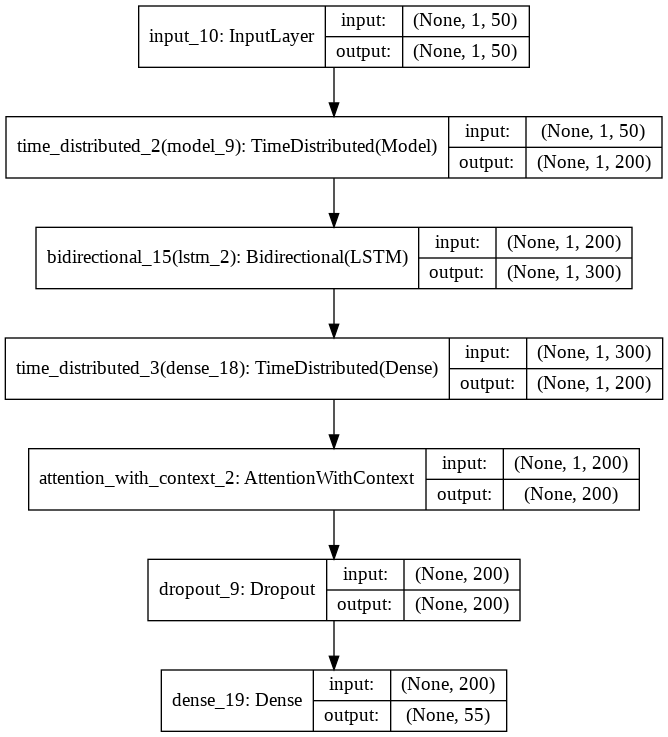

In [0]:
# Words level attention model
word_input = Input(shape=((MAX_SENTS * MAX_SENT_LENGTH),))
word_sequences = Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False)(word_input)
word_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
word_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(word_lstm)
word_att = AttentionWithContext()(word_dense)
wordEncoder = Model(word_input, word_att)

# Sentence level attention model
sent_input = Input(shape=(MAX_SENTS, MAX_SENT_LENGTH), dtype='float32')
sent_encoder = TimeDistributed(wordEncoder)(sent_input)
sent_lstm = Bidirectional(LSTM(150, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
sent_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(sent_lstm)
sent_att = Dropout(0.5)(AttentionWithContext()(sent_dense))
preds = Dense(55, activation='softmax')(sent_att)
modelHAN = Model(sent_input, preds)
modelHAN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

#Compile Model
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
modelHAN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
print(modelHAN.summary())
chck=ModelCheckpoint('Capstone_HAN_attention_best_model.h5', monitor='val_loss', mode='min', verbose=1,save_best_only=True)
from keras.utils import plot_model
plot_model(modelHAN, show_shapes= True,to_file='model_final.png')


In [0]:
#Fit Model
modelHAN.fit(x_train_d.reshape(len(x_train_d),MAX_SENTS,MAX_SENT_LENGTH),y_train_d,validation_split = 0.2,epochs=10, batch_size=32,verbose = True,callbacks=[rlrop,chck])

Train on 3372 samples, validate on 844 samples
Epoch 1/10
3372/3372 [==============================] - 31s 9ms/step - loss: 2.4582 - acc: 0.4956 - val_loss: 2.2075 - val_acc: 0.5261

Epoch 00001: val_loss improved from inf to 2.20754, saving model to Capstone_HAN_attention_best_model.h5
Epoch 2/10
3372/3372 [==============================] - 23s 7ms/step - loss: 2.0735 - acc: 0.5282 - val_loss: 2.0124 - val_acc: 0.5415

Epoch 00002: val_loss improved from 2.20754 to 2.01241, saving model to Capstone_HAN_attention_best_model.h5
Epoch 3/10
3372/3372 [==============================] - 23s 7ms/step - loss: 1.8898 - acc: 0.5483 - val_loss: 1.9121 - val_acc: 0.5521

Epoch 00003: val_loss improved from 2.01241 to 1.91209, saving model to Capstone_HAN_attention_best_model.h5
Epoch 4/10
3372/3372 [==============================] - 23s 7ms/step - loss: 1.7308 - acc: 0.5694 - val_loss: 1.8203 - val_acc: 0.5640

Epoch 00004: val_loss improved from 1.91209 to 1.82035, saving model to Capstone_HAN_a

In [0]:
%%time
# evaluating model on validation data set
loss, acc = modelHAN.evaluate([x_val_d.reshape(len(x_val_d),MAX_SENTS , MAX_SENT_LENGTH)], y_val_d, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', acc)

1055/1055 [==============================] - 2s 2ms/step
Test loss: 1.9401661766648857
Test accuracy: 0.5582938384670781
CPU times: user 2.85 s, sys: 52.1 ms, total: 2.9 s
Wall time: 1.61 s


In [0]:
#Prediction
y_pred = modelHAN.predict([x_val_d.reshape(len(x_val_d),MAX_SENTS , MAX_SENT_LENGTH)], verbose=1)
y_pred_index = np.argmax(y_pred, axis=1)
y_pred_class = (y_pred == y_pred.max(axis=1, keepdims=True)).astype(int)
print(f"y_pred_class: {y_pred_class[1001]}")

1055/1055 [==============================] - 3s 3ms/step
y_pred_class: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [0]:
from sklearn.metrics import classification_report
#print("y_pred_class: ", y_pred_class[:1])
#print("y_test: ", y_val_d[:1])
print("Classification Report",'\n')
print(classification_report(y_val_d, y_pred_class, target_names=data_df.target1.unique()))

Classification Report 

              precision    recall  f1-score   support

       GRP_0       0.72      0.84      0.78       484
       GRP_1       0.00      0.00      0.00         4
       GRP_3       0.46      0.50      0.48        12
       GRP_4       0.00      0.00      0.00         4
       GRP_5       0.45      0.50      0.47        44
       GRP_7       0.20      0.48      0.29        23
       GRP_8       0.26      0.37      0.30        19
       GRP_6       0.33      0.25      0.29         4
       GRP_9       0.45      0.42      0.43        12
      GRP_11       0.00      0.00      0.00         3
      GRP_14       0.29      0.13      0.18        15
      GRP_15       0.13      0.17      0.15        23
      GRP_17       0.36      0.45      0.40        40
      GRP_18       0.00      0.00      0.00         5
       GRP_2       0.00      0.00      0.00         5
      GRP_19       0.40      0.50      0.44         4
      GRP_20       0.00      0.00      0.00         7
   

TextCNN with single channel

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 100)         896800    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          9632      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               295936    
_________________________________________________________________
dense_24 (Dense)             (None, 55)                14135     
Total params: 1,216,503
Trainable params: 319,703
Non-trainable params: 896,800
_________________________________________________________________
None


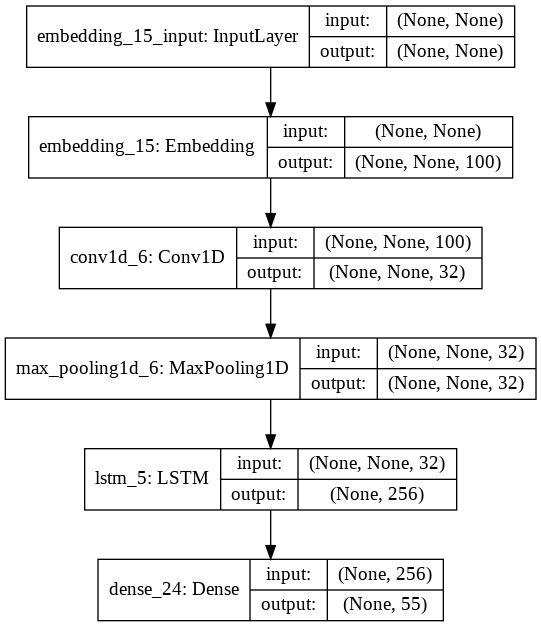

In [0]:
# LSTM and CNN for Text classification 
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence

modelCNN = Sequential()
modelCNN.add(Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False))
modelCNN.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
modelCNN.add(MaxPooling1D(pool_size=2))
#model1.add(Flatten()) 
modelCNN.add(LSTM(256))
modelCNN.add(Dense(55, activation='softmax'))
modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelCNN.summary())
from keras.utils import plot_model
plot_model(modelCNN, show_shapes= True,to_file='model_final.png')



In [0]:
modelCNN.fit(x_train_d.reshape(len(x_train_d),(MAX_SENTS * MAX_SENT_LENGTH)),y_train_d,validation_split = 0.2,epochs=25, batch_size=32,verbose = True)

Train on 3372 samples, validate on 844 samples
Epoch 1/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.4183 - acc: 0.6133 - val_loss: 1.9135 - val_acc: 0.5782
Epoch 2/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.3656 - acc: 0.6254 - val_loss: 1.9900 - val_acc: 0.5640
Epoch 3/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.3277 - acc: 0.6320 - val_loss: 1.8779 - val_acc: 0.5664
Epoch 4/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.2733 - acc: 0.6423 - val_loss: 2.0089 - val_acc: 0.5782
Epoch 5/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.2345 - acc: 0.6501 - val_loss: 1.9390 - val_acc: 0.5533
Epoch 6/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.1651 - acc: 0.6756 - val_loss: 1.9609 - val_acc: 0.5569
Epoch 7/25
3372/3372 [==============================] - 9s 3ms/step - loss: 1.1117 - acc: 0.6898 - val_loss: 2.0251 - val_acc: 0.5533
Epoch 8/25
3372

In [0]:
# save model and architecture to single file
model.save("TextCNNmodel.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
%%time
# evaluating model on validation data set
loss, acc = modelCNN.evaluate([x_val_d.reshape(len(x_val_d),(MAX_SENTS*MAX_SENT_LENGTH))], y_val_d, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', acc)

1055/1055 [==============================] - 1s 555us/step
Test loss: 2.8818023460171234
Test accuracy: 0.5118483408932437
CPU times: user 965 ms, sys: 21.6 ms, total: 987 ms
Wall time: 588 ms


In [0]:
#Prediction
y_pred = modelCNN.predict([x_val_d.reshape(len(x_val_d),(MAX_SENTS*MAX_SENT_LENGTH))], verbose=1)
y_pred_index = np.argmax(y_pred, axis=1)
y_pred_class = (y_pred == y_pred.max(axis=1, keepdims=True)).astype(int)
print(f"y_pred_class: {y_pred_class[1001]}")

1055/1055 [==============================] - 2s 2ms/step
y_pred_class: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
from sklearn.metrics import classification_report
#print("y_pred_class: ", y_pred_class[:1])
#print("y_test: ", y_val_d[:1])
print("Classification Report",'\n')
print(classification_report(y_val_d, y_pred_class, target_names=data_df.target1.unique()))

Classification Report 

              precision    recall  f1-score   support

       GRP_0       0.76      0.75      0.75       484
       GRP_1       0.17      0.25      0.20         4
       GRP_3       0.17      0.25      0.20        12
       GRP_4       0.00      0.00      0.00         4
       GRP_5       0.44      0.57      0.50        44
       GRP_7       0.45      0.43      0.44        23
       GRP_8       0.15      0.16      0.15        19
       GRP_6       0.11      0.25      0.15         4
       GRP_9       0.17      0.33      0.23        12
      GRP_11       0.00      0.00      0.00         3
      GRP_14       0.18      0.13      0.15        15
      GRP_15       0.09      0.17      0.11        23
      GRP_17       0.32      0.38      0.34        40
      GRP_18       0.00      0.00      0.00         5
       GRP_2       0.00      0.00      0.00         5
      GRP_19       0.00      0.00      0.00         4
      GRP_20       0.00      0.00      0.00         7
   

Multi Channel Text CNN

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_54 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
input_55 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
input_56 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_56 (Embedding)        (None, 50, 100)      896800      input_54[0][0]                   
___________________________________________________________________________________________

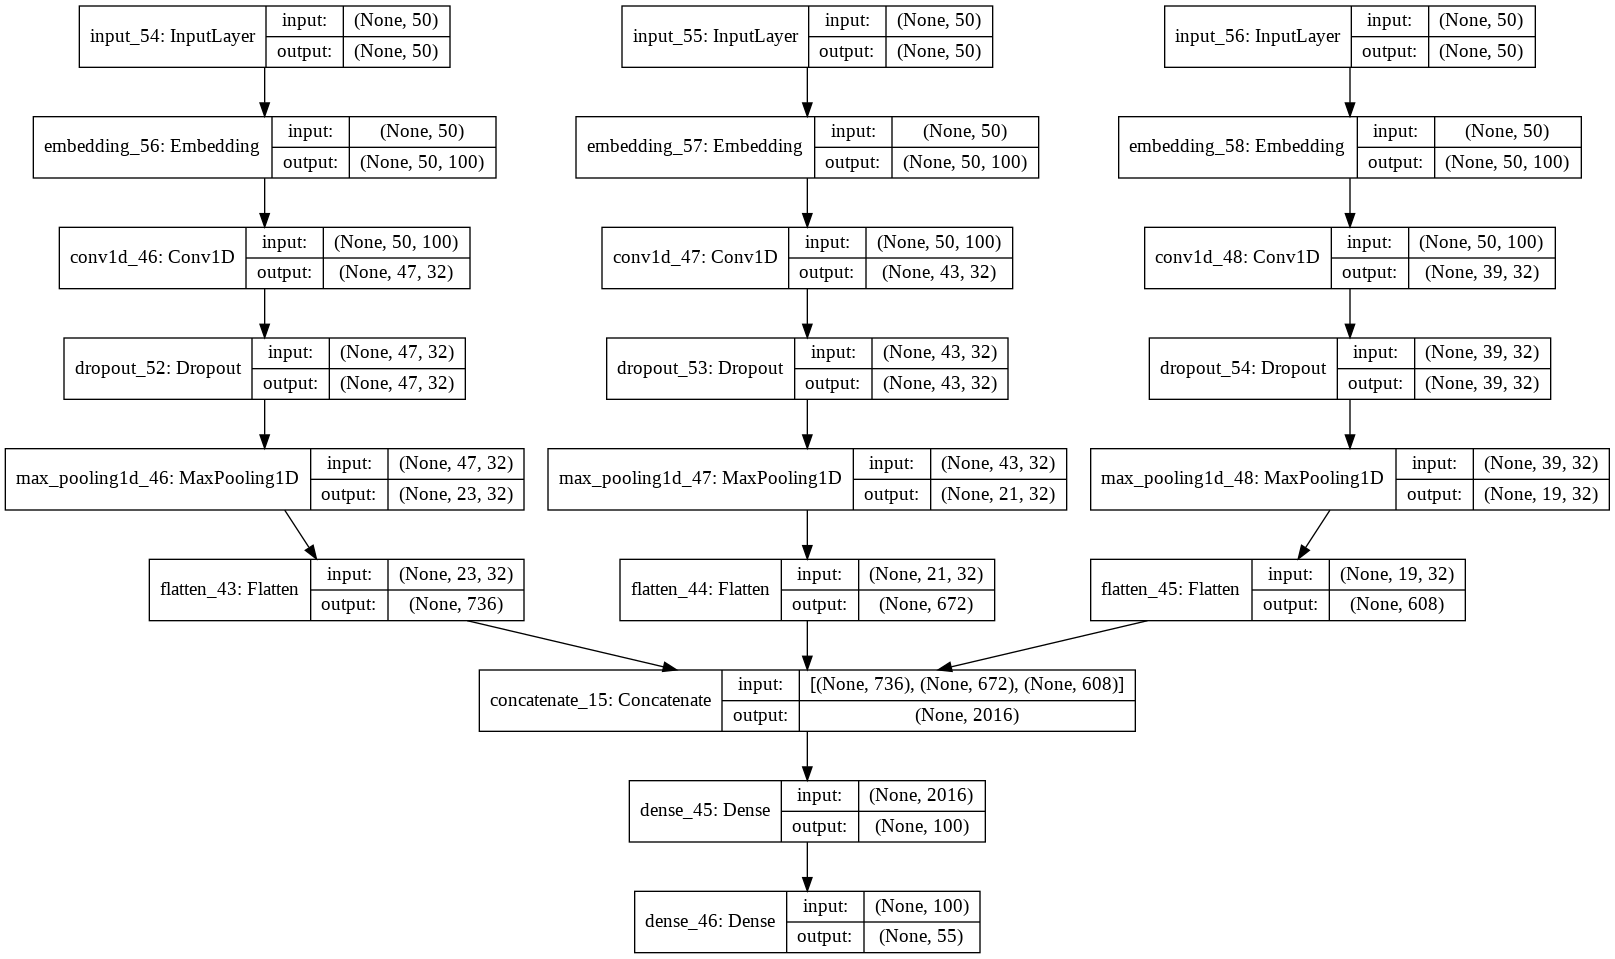

In [0]:
# channel 1
inputs1 = Input(shape=((MAX_SENTS * MAX_SENT_LENGTH),))
embedding1 = Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False)(inputs1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.1)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

# channel 2
inputs2 = Input(shape=((MAX_SENTS * MAX_SENT_LENGTH),))
embedding2 = Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False)(inputs2)
conv2 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding2)
drop2 = Dropout(0.1)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)

# channel 3
inputs3 = Input(shape=((MAX_SENTS * MAX_SENT_LENGTH),))
embedding3 = Embedding(len(token.word_index)+1, embedding_matrix.shape[1], weights=[embedding_matrix], trainable=False)(inputs3)
conv3 = Conv1D(filters=32, kernel_size=12, activation='relu')(embedding3)
drop3 = Dropout(0.1)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

# merge
merged = concatenate([flat1, flat2, flat3])
#merged = concatenate([pool1, pool2, pool3])

# interpretation
#BRNN = (LSTM(128,dropout=0.25,recurrent_dropout=0.25))((merged,))
dense1 = Dense(100, activation='relu')(merged)
outputs = Dense(55, activation='sigmoid')(dense1)
modelMCNN = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	
# compile
modelMCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	
# summarize
print(modelMCNN.summary())
plot_model(modelMCNN, show_shapes=True, to_file='multichannel.png')


In [0]:
modelMCNN.fit([x_train_d.reshape(len(x_train_d),(MAX_SENTS * MAX_SENT_LENGTH)),x_train_d.reshape(len(x_train_d),(MAX_SENTS * MAX_SENT_LENGTH)),x_train_d.reshape(len(x_train_d),(MAX_SENTS * MAX_SENT_LENGTH))],y_train_d,validation_split = 0.2,epochs=10, batch_size=256,verbose = True)

Train on 3372 samples, validate on 844 samples
Epoch 1/10
3372/3372 [==============================] - 10s 3ms/step - loss: 3.6747 - acc: 0.3977 - val_loss: 3.3846 - val_acc: 0.4964
Epoch 2/10
3372/3372 [==============================] - 2s 653us/step - loss: 3.1694 - acc: 0.4887 - val_loss: 3.0381 - val_acc: 0.4964
Epoch 3/10
3372/3372 [==============================] - 2s 650us/step - loss: 2.7447 - acc: 0.4757 - val_loss: 2.7328 - val_acc: 0.4846
Epoch 4/10
3372/3372 [==============================] - 2s 655us/step - loss: 2.3893 - acc: 0.4715 - val_loss: 2.5575 - val_acc: 0.4846
Epoch 5/10
3372/3372 [==============================] - 2s 667us/step - loss: 2.1410 - acc: 0.4715 - val_loss: 2.2772 - val_acc: 0.4846
Epoch 6/10
3372/3372 [==============================] - 2s 653us/step - loss: 1.8106 - acc: 0.4715 - val_loss: 2.1989 - val_acc: 0.4846
Epoch 7/10
3372/3372 [==============================] - 2s 652us/step - loss: 1.6098 - acc: 0.4715 - val_loss: 2.1755 - val_acc: 0.4846
Ep

In [0]:
%%time
# evaluating model on validation data set
loss, acc = modelMCNN.evaluate([x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH)),x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH)),x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH))], y_val_d, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', acc)

1055/1055 [==============================] - 0s 286us/step
Test loss: 2.2325533240892312
Test accuracy: 0.45876777211636727
CPU times: user 439 ms, sys: 38.4 ms, total: 478 ms
Wall time: 304 ms


In [0]:
#Prediction
y_pred = modelMCNN.predict([x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH)),x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH)),x_val_d.reshape(len(x_val_d),(MAX_SENTS * MAX_SENT_LENGTH))], verbose=1)
y_pred_index = np.argmax(y_pred, axis=1)
y_pred_class = (y_pred == y_pred.max(axis=1, keepdims=True)).astype(int)
print(f"y_pred_class: {y_pred_class[1001]}")

1055/1055 [==============================] - 3s 3ms/step
y_pred_class: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
from sklearn.metrics import classification_report
#print("y_pred_class: ", y_pred_class[:1])
#print("y_test: ", y_val_d[:1])
print("Classification Report",'\n')
print(classification_report(y_val_d, y_pred_class, target_names=data_df.target1.unique()))

Classification Report 

              precision    recall  f1-score   support

       GRP_0       0.46      1.00      0.63       484
       GRP_1       0.00      0.00      0.00         4
       GRP_3       0.00      0.00      0.00        12
       GRP_4       0.00      0.00      0.00         4
       GRP_5       0.00      0.00      0.00        44
       GRP_7       0.00      0.00      0.00        23
       GRP_8       0.00      0.00      0.00        19
       GRP_6       0.00      0.00      0.00         4
       GRP_9       0.00      0.00      0.00        12
      GRP_11       0.00      0.00      0.00         3
      GRP_14       0.00      0.00      0.00        15
      GRP_15       0.00      0.00      0.00        23
      GRP_17       0.00      0.00      0.00        40
      GRP_18       0.00      0.00      0.00         5
       GRP_2       0.00      0.00      0.00         5
      GRP_19       0.00      0.00      0.00         4
      GRP_20       0.00      0.00      0.00         7
   